# Remy Wang

## Research Question/ Interest

### How do aspects in the personal profile indicated by gender, education, marital status, and age in this dataset individually determine the number of months for payment delay? 
* Which category in the sex group affect the length of payment delay the most?
* How is feature of the education level affect the length of payment delay?
* Which martial status caused payment delay the most?
* How will the age determine the length of payment delay?

##### My analysis plan will be first dropping all the columns involved with the amount of the given credit (NT dollar), amount of bill statement (NT dollar), and amount of previous payment (NT dollar). The rest of the data frame will be saved into a new data frame and the first index column will be removed. Next, the column names for the new data frame will be renamed to more representative terms. In addition, rows with exceptional or missing values in the new data frame will also be removed. The new column which contains the average numbers of payback months from the past payment history will be created. Furthermore, one categorical variable and one numerical variable such as marital status and the average numbers of payback months will be grouped together then side-by-side, and grouped boxplots will be plotted for visualizations. 



In [2]:
import pandas as pd
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop('Unnamed: 0',axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Exploratory Data Analysis (EDA)

In [3]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
df.shape

(30001, 25)

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
# Check to see the column name
second_columnn_name=df.iloc[0:1]
second_columnn_name

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [7]:
df.nunique(axis=0)

Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

In [8]:
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


In [9]:
# Drop redudant variables
df2=df.drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
df2

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0
29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,1,2,2,37,4,3,2,-1,0,0
29999,1,3,1,41,1,-1,0,0,0,-1


In [10]:
# Renaming the first index row to more reasonable name
df3=df2.rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
df3

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0
29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,1,2,2,37,4,3,2,-1,0,0
29999,1,3,1,41,1,-1,0,0,0,-1


In [11]:
# Drop the duplicate column name row and reset the index
df4=df3.iloc[1:].reset_index(drop=True)
df4

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,26,-1,2,0,0,0,2
2,2,2,2,34,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,39,0,0,0,0,0,0
29996,1,3,2,43,-1,-1,-1,-1,0,0
29997,1,2,2,37,4,3,2,-1,0,0
29998,1,3,1,41,1,-1,0,0,0,-1


In [12]:
# Replace the number variables in the categorical column to more reasonabel name
df4['Sex']=df4['Sex'].replace([1,2],['male','female'])
df4['Education']=df4['Education'].replace([1,2,3,4],['graduate school','university', 'high school','others'])
df4['Marriage']=df4['Marriage'].replace([1,2,3],['married','single','others'])
df4

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,female,university,married,24,2,2,-1,-1,-2,-2
1,female,university,single,26,-1,2,0,0,0,2
2,female,university,single,34,0,0,0,0,0,0
3,female,university,married,37,0,0,0,0,0,0
4,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,39,0,0,0,0,0,0
29996,male,high school,single,43,-1,-1,-1,-1,0,0
29997,male,university,single,37,4,3,2,-1,0,0
29998,male,high school,married,41,1,-1,0,0,0,-1


In [13]:
# Check variables' types in df4
df4.dtypes

Sex          object
Education    object
Marriage     object
Age          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
dtype: object

In [14]:
# Change numerical column's type into numeric
df4[['Age','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]=df4[['Age','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(pd.to_numeric)
df4.dtypes

Sex          object
Education    object
Marriage     object
Age           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
dtype: object

In [15]:
df4['Sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
df4['Education'].unique()

array(['university', 'graduate school', 'high school', 5, 'others', 6, 0],
      dtype=object)

In [17]:
df4['Marriage'].unique()

array(['married', 'single', 'others', 0], dtype=object)

In [18]:
df4['Age'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [19]:
df4['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [20]:
df4['PAY_2'].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [21]:
df4['PAY_3'].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8])

In [22]:
df4['PAY_4'].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8])

In [23]:
df4['PAY_6'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [24]:
# Removing rows which contain unusual values
df5=(df4
    .loc[lambda x: x['Marriage']!=0]
    .loc[lambda x: x['Education']!=0]
    .loc[lambda x: x['Education']!=5]
    .loc[lambda x: x['Education']!=6]
    .reset_index(drop=True)
    )
df5

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,female,university,married,24,2,2,-1,-1,-2,-2
1,female,university,single,26,-1,2,0,0,0,2
2,female,university,single,34,0,0,0,0,0,0
3,female,university,married,37,0,0,0,0,0,0
4,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0
29597,male,high school,single,43,-1,-1,-1,-1,0,0
29598,male,university,single,37,4,3,2,-1,0,0
29599,male,high school,married,41,1,-1,0,0,0,-1


In [25]:
# Drop rows with NaNs
df6=df5.dropna(axis=0)
df6.shape

(29601, 10)

In [26]:
# Add the new column about the average months of repayment
df7=df6
df7['Average_Repayment_Status']=df6[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
df7

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Average_Repayment_Status
0,female,university,married,24,2,2,-1,-1,-2,-2,-0.333333
1,female,university,single,26,-1,2,0,0,0,2,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,-1,0,-1,0,0,0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,-1,-1,-1,-1,0,0,-0.666667
29598,male,university,single,37,4,3,2,-1,0,0,1.333333
29599,male,high school,married,41,1,-1,0,0,0,-1,-0.166667


In [27]:
# Renaming the numerical column to more reasonable name and change the order
df8=df7.rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')
df9=df8[['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status']]
df9

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


In [28]:
df9.shape

(29601, 11)

In [29]:
df_categorical_columns=df9.describe(exclude=[np.number]).T
df_categorical_columns

,count,unique,top,freq
Sex,29601,2,female,17855
Education,29601,4,university,14024
Marriage,29601,3,single,15806


In [30]:
df_numerical_columns=df9.describe(include=[np.number]).T
df_numerical_columns

,count,mean,std,min,25%,50%,75%,max
Age,29601.0,35.464072,9.213243,21.0,28.000000,34.0,41.0,79.0
"Repayment_Status_April,2005",29601.0,-0.287558,1.152206,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_May,2005",29601.0,-0.263978,1.136217,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_June,2005",29601.0,-0.218303,1.172220,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_July,2005",29601.0,-0.163440,1.199793,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_August,2005",29601.0,-0.131313,1.199642,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_September,2005",29601.0,-0.014932,1.124503,-2.0,-1.000000,0.0,0.0,8.0
Average_Repayment_Status,29601.0,-0.179921,0.984192,-2.0,-0.833333,0.0,0.0,6.0


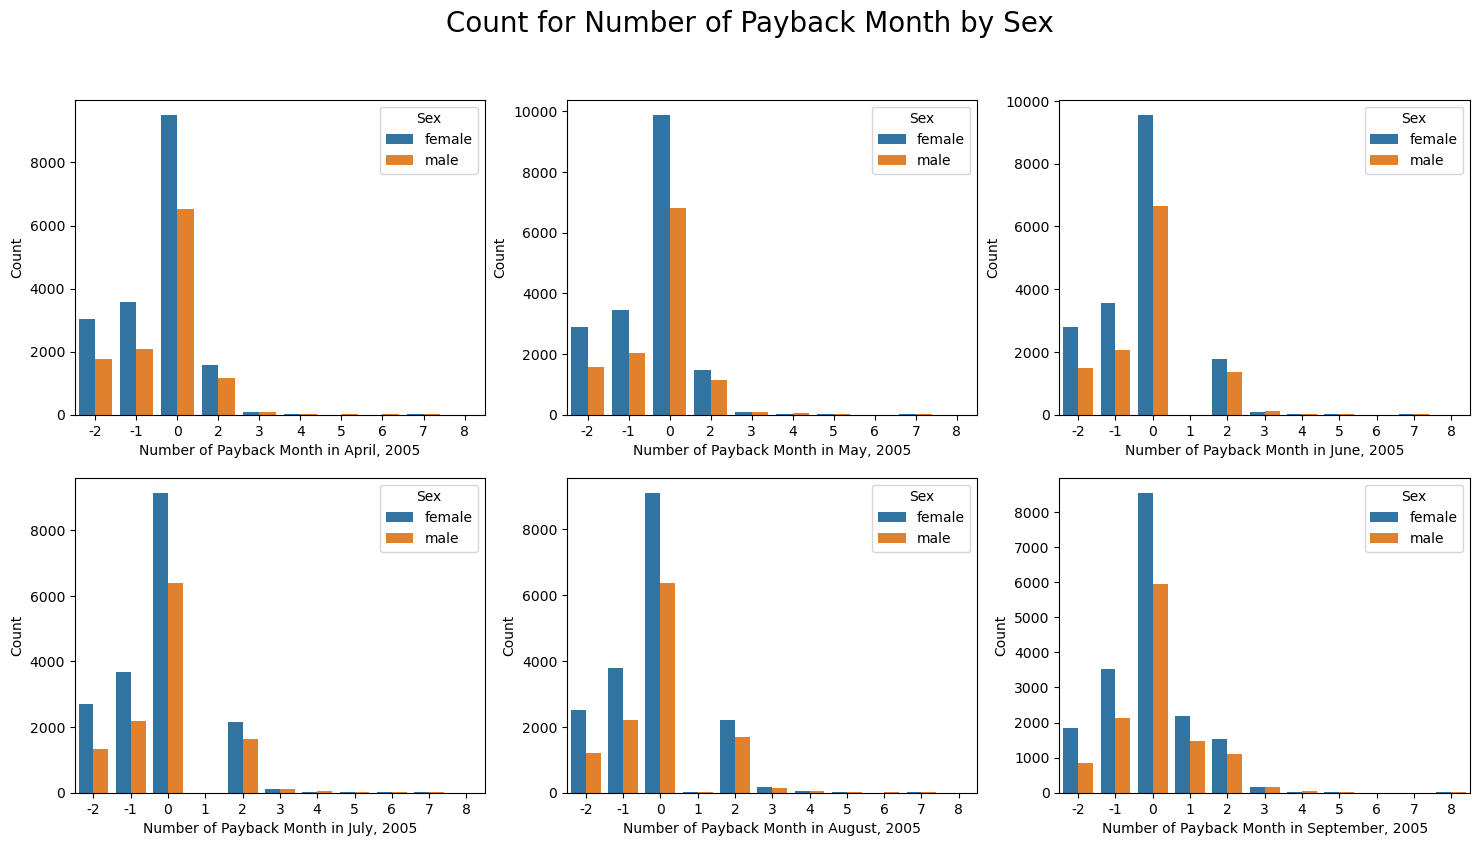

In [31]:
fig=plt.figure(figsize=(18,9))
fig.suptitle("Count for Number of Payback Month by Sex", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- Most of the sample clients in both gender groups paid their bills no later than two months, and the counts for repayment status divided by gender look similar to each other across April to September in 2005. Obvious correlations are not presented in this group of plots. 

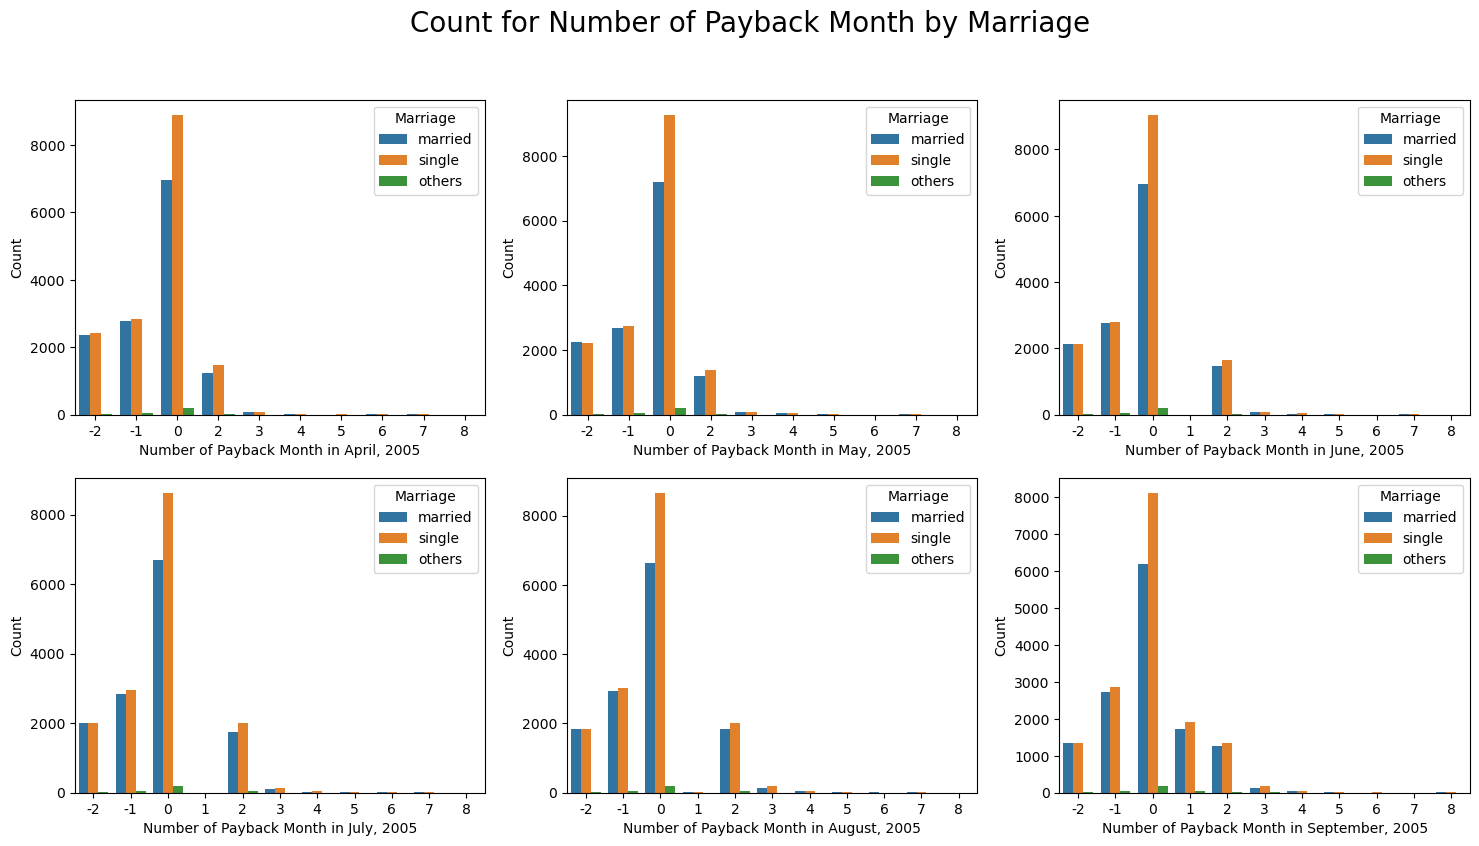

In [32]:
fig2=plt.figure(figsize=(18,9))
fig2.suptitle("Count for Number of Payback Month by Marriage", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- The pattern for repayment status divided by marital status looks similar from April to September in 2005. Sample clients in all three marital status's number of payback months centralize around 0, and no distinct difference between this group of plots are being observed.  

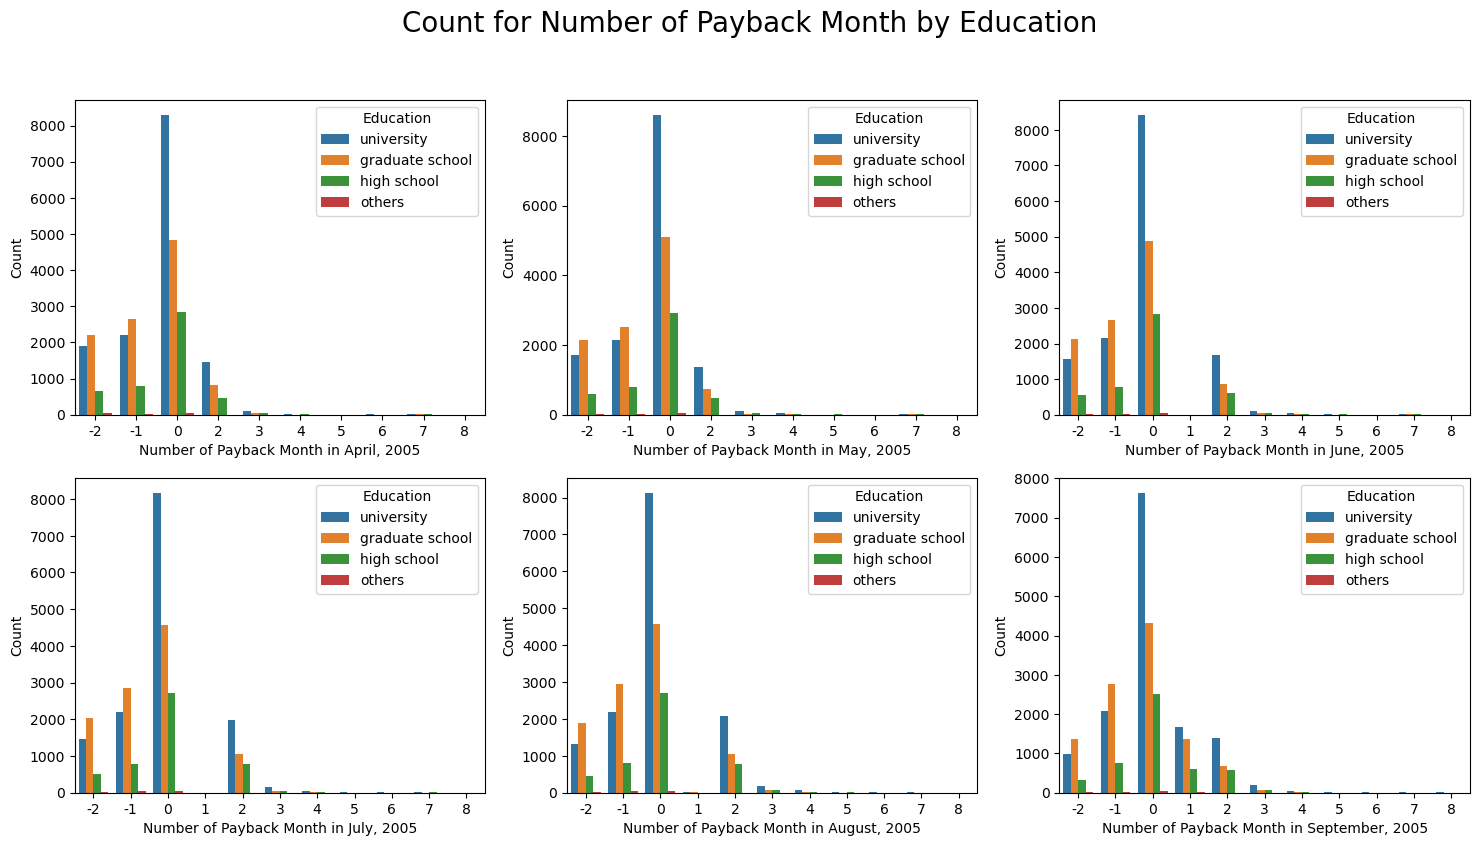

In [33]:
fig3=plt.figure(figsize=(18,9))
fig3.suptitle("Count for Number of Payback Month by Education", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- The pattern for repayment status divided by education level looks similar through April to September in 2005 and mainly concentrates on the range of pay duly to delay for two months. The trend for this group of plots is identical to the two previous groups(sex and marital status).

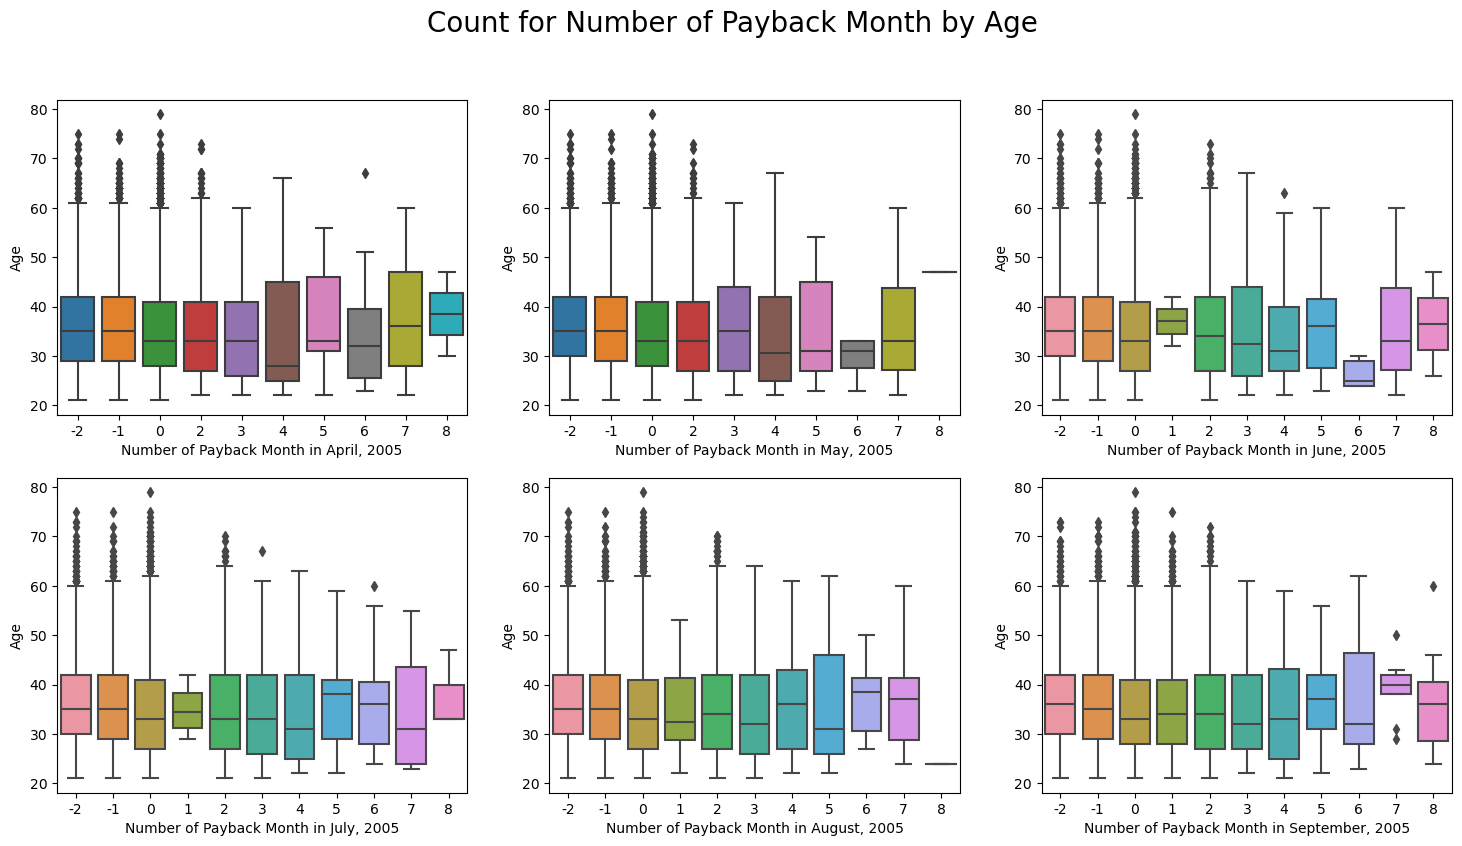

In [34]:
fig4=plt.figure(figsize=(18,9))
fig4.suptitle("Count for Number of Payback Month by Age", fontsize=20)
plt.subplot(2,3,1)
sns.boxplot(x='Repayment_Status_April,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Age')
plt.subplot(2,3,2)
sns.boxplot(x='Repayment_Status_May,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Age')
plt.subplot(2,3,3)
sns.boxplot(x='Repayment_Status_June,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Age')
plt.subplot(2,3,4)
sns.boxplot(x='Repayment_Status_July,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Age')
plt.subplot(2,3,5)
sns.boxplot(x='Repayment_Status_August,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Age')
plt.subplot(2,3,6)
sns.boxplot(x='Repayment_Status_September,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Age')
plt.show()

- There is no obvious pattern indicated in this group of plots. 

### Analysis Pipeline

1. Load Data 
-  Import pandas package.
-  Use pandas package to load data set.
-  Skip the duplicate index column.

In [57]:
import pandas as pd
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


2. Clean Data
- Remove "Unnamed: 0", "X1", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23", "Y" column which is not being used and stored into a new data frame.
- Remove rows with unusual values in the new data frame such as "0", "5", and "6" in the "X3" column and "0" in the "X4" column.
- Remove rows with NaN value in the new data frame. 

In [66]:
df2=df.drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
df3=(df2
    .loc[lambda x: x['X4']!=0]
    .loc[lambda x: x['X3']!=0]
    .loc[lambda x: x['X3']!=5]
    .loc[lambda x: x['X3']!=6]
    .reset_index(drop=True)
    )
df4=df3.dropna(axis=0)
df4

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29597,1,3,1,39,0,0,0,0,0,0
29598,1,3,2,43,-1,-1,-1,-1,0,0
29599,1,2,2,37,4,3,2,-1,0,0
29600,1,3,1,41,1,-1,0,0,0,-1


3. Process Data
- Rename the index row into more understandable names and remove the first row which is with duplicate names. 
- Calculate the average of payback months (the mean of "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6") for each row and create a new column called "Average_Repayment_Status".
- Change the order of "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" column based on the month.  
- Rename the "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" column to more representative names. 
- Replace the numeric values in the "Sex", "Education", and "Marriage" column with values that are more representative. 

In [70]:
df5=df4.rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
df6=df5.iloc[1:].reset_index(drop=True)
df6["Average_Repayment_Status"]=df6[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
df7=df6.rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')
df8=df7[['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status']]
df8['Sex']=df8['Sex'].replace([1,2],['male','female'])
df8['Education']=df8['Education'].replace([1,2,3,4],['graduate school','university', 'high school','others'])
df8['Marriage']=df8['Marriage'].replace([1,2,3],['married','single','others'])
df9=df8
df9

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


4. Wrangle Data
- Group data for each categorical column with each month's repayment status column and make the count of grouped data into a data frame (inside the function that make visualization).
- Group data for the "Age" column and "Average_Repayment_Status" column and make the count of grouped data into a data frame (inside the function that make visualization). 
- "Contate" function will also be used later in making visualization to add missing rows. 


#### Method Chaining and Writing Python programs

In [143]:
mc=(
    pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
    .drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
    .rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
    .iloc[1:]
    .rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')  
)
mc

,Sex,Education,Marriage,Age,"Repayment_Status_September,2005","Repayment_Status_August,2005","Repayment_Status_July,2005","Repayment_Status_June,2005","Repayment_Status_May,2005","Repayment_Status_April,2005"
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
5,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0
29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,1,2,2,37,4,3,2,-1,0,0
29999,1,3,1,41,1,-1,0,0,0,-1


In [144]:
mc2=(
    mc
    .assign(Marriage=lambda x: np.where(x.Marriage==0,np.nan,x.Marriage))
    .loc[lambda x: x['Education']!=0]
    .loc[lambda x: x['Education']!=5]
    .loc[lambda x: x['Education']!=6] 
    .dropna(axis=0)
    .apply(pd.to_numeric)
    .reset_index(drop=True)
)
mc2

,Sex,Education,Marriage,Age,"Repayment_Status_September,2005","Repayment_Status_August,2005","Repayment_Status_July,2005","Repayment_Status_June,2005","Repayment_Status_May,2005","Repayment_Status_April,2005"
0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,26,-1,2,0,0,0,2
2,2,2,2,34,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29596,1,3,1,39,0,0,0,0,0,0
29597,1,3,2,43,-1,-1,-1,-1,0,0
29598,1,2,2,37,4,3,2,-1,0,0
29599,1,3,1,41,1,-1,0,0,0,-1


In [145]:
mc3=(
     mc2
     .assign(Average_Repayment_Status=(lambda x: mc2[['Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005']].mean(axis=1)))
     .reindex(columns=['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status'])
     .assign(Sex=lambda x: np.where(x.Sex==1,'male','female'))
     .replace({'Marriage':[1,2,3],'Education':[1,2,3,4]},{'Marriage':['married','single','others'],'Education':['graduate school','university','high school','others']}) 
)
mc3


,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


In [149]:
def load_and_process(path_to_csv_file):
    
    # Method Chain 1 (Load data, drop unused column, drop index row, and rename column name)
    
    df=(
    pd.read_excel(io=path_to_csv_file)
    .drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
    .rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
    .iloc[1:]
    .rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')
    )
    
    # Method Chain 2 (Drop unusual values, drop NaNs, change the data frame's type to numeric, and reset the index)
    
    df2=(
    df
    .assign(Marriage=lambda x: np.where(x.Marriage==0,np.nan,x.Marriage))
    .loc[lambda x: x['Education']!=0]
    .loc[lambda x: x['Education']!=5]
    .loc[lambda x: x['Education']!=6] 
    .dropna(axis=0)
    .apply(pd.to_numeric)
    .reset_index(drop=True)
    )
    
    # Method Chain 3 (Create a new column, reorder all the columns, and replace numeric values in some columns with more representative names)
    
    df3=(
     df2
     .assign(Average_Repayment_Status=(lambda x: mc2[['Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005']].mean(axis=1)))
     .reindex(columns=['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status'])
     .assign(Sex=lambda x: np.where(x.Sex==1,'male','female'))
     .replace({'Marriage':[1,2,3],'Education':[1,2,3,4]},{'Marriage':['married','single','others'],'Education':['graduate school','university','high school','others']}) 
    )
    return mc3
    

In [150]:
load_and_process('../data/raw/default of credit card clients.xls')

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


In [35]:
import sys
sys.path.append('./code')

In [32]:
import code

In [39]:
import project_functions_Remy as pf
df = pf.load_and_process('../data/raw/default of credit card clients.xls')
df

NameError: name 'mc2' is not defined

In [114]:
def plot1(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp1=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        femaledf=dfp1.loc[dfp1['Sex']=='female']
        new_row= {'Sex':'female', colname:8, 0:0}
        new_df= pd.DataFrame([new_row])
        new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
        maledf=dfp1.loc[dfp1['Sex']=='male']
        totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(maledf[0], totals)]
        rows=dfp1[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 1)
        plot1=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in April, 2005'),
               plt.ylabel('Proportion'),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot1

In [36]:
def plot2(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp2=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        dfp2.loc[6.5]=['female',6,0]
        dfp2=dfp2.sort_index().reset_index(drop=True)
        femaledf=dfp2.loc[dfp2['Sex']=='female']
        new_row= {'Sex':'female', colname:8, 0:0}
        new_df= pd.DataFrame([new_row])
        new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
        maledf=dfp2.loc[dfp2['Sex']=='male']
        totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(maledf[0], totals)]
        rows=dfp2[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 2)
        plot2=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in May, 2005'),
               plt.ylabel('Proportion'),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot2

In [37]:
def plot3(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp3=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        dfp3.loc[2.5]=['female',1,0]
        dfp3=dfp3.sort_index().reset_index(drop=True)
        femaledf=dfp3.loc[dfp3['Sex']=='female']
        new_row= {'Sex':'female', colname:8, 0:0}
        new_df= pd.DataFrame([new_row])
        new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
        maledf=dfp3.loc[dfp3['Sex']=='male']
        totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(maledf[0], totals)]
        rows=dfp3[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2,1,1)
        plot3=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in June, 2005'),
               plt.ylabel('Proportion'),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot3

In [38]:
def plot4(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp4=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        dfp4.loc[2.5]=['female',1,0]
        dfp4=dfp4.sort_index().reset_index(drop=True)
        femaledf=dfp4.loc[dfp4['Sex']=='female']
        new_row= {'Sex':'female', colname:8, 0:0}
        new_df= pd.DataFrame([new_row])
        new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
        maledf=dfp4.loc[dfp4['Sex']=='male']
        totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(maledf[0], totals)]
        rows=dfp4[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2,1,2)
        plot4=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in July, 2005'),
               plt.ylabel('Proportion'),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot4

In [39]:
def plot5(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp5=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        femaledf=dfp5.loc[dfp5['Sex']=='female']
        maledf=dfp5.loc[dfp5['Sex']=='male']
        new_row= {'Sex':'male', colname:8, 0:0}
        new_df= pd.DataFrame([new_row])
        new_maledf=pd.concat([maledf,new_df],axis=0,ignore_index=True)
        totals = [i+j for i,j in zip(femaledf[0],new_maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(new_maledf[0], totals)]
        rows=dfp5[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2,1,1)
        plot5=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in August, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot5

In [40]:
def plot6(colname):
        '''
        This function creates a data frame with the 'Sex' and desired column and splits the data frame into each gender group. 
        Then add the missing values for each gender group in order to get the count of female and male sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each gender group based on the number of payback months for one month in 2005.
        
        '''
        dfp6=df9.groupby(['Sex',colname]).size().to_frame().reset_index()
        femaledf=dfp6.loc[dfp6['Sex']=='female']
        maledf=dfp6.loc[dfp6['Sex']=='male']
        totals = [i+j for i,j in zip(femaledf[0],maledf[0])]
        bottomBars = [i / j * 100 for i,j in zip(femaledf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(maledf[0], totals)]
        rows=dfp6[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2,1,2)
        plot6=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=bottomBars, color='#f9bc86', edgecolor='white',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in September, 2005'),
               plt.ylabel('Proportion'),
               plt.tight_layout(),
               plt.legend(['Female', 'Male'], loc ='upper right',bbox_to_anchor=(1.22, 1)),
               plt.show())
        return plot6

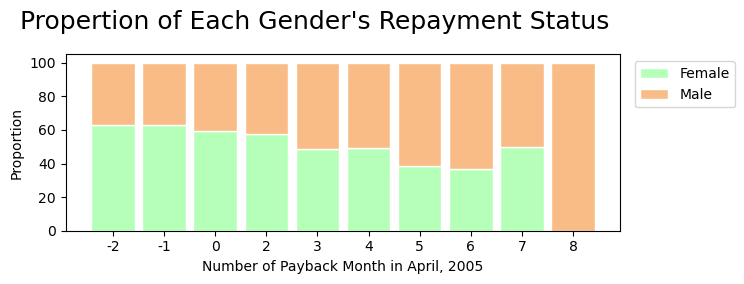

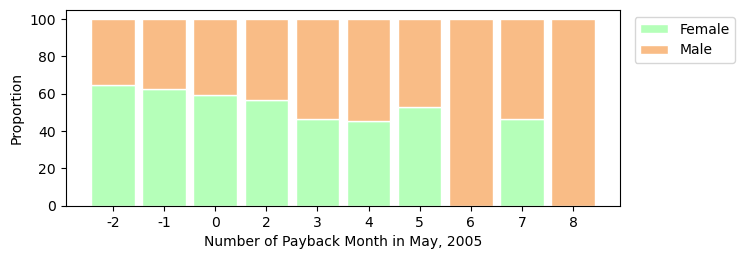

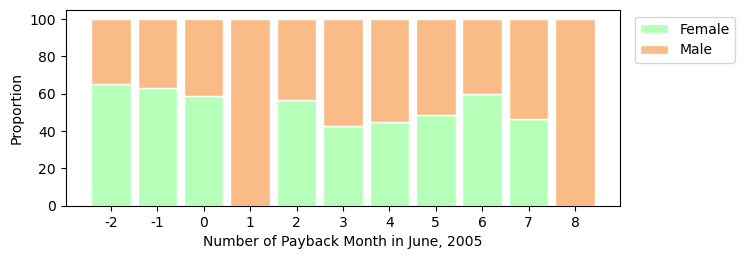

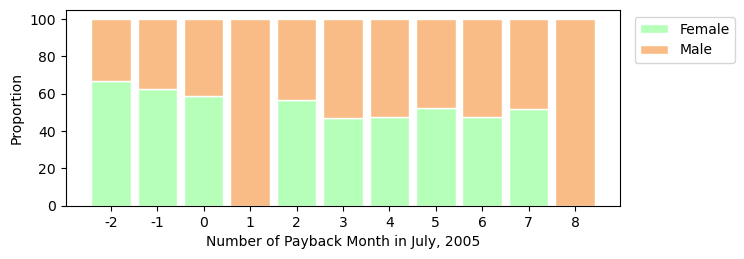

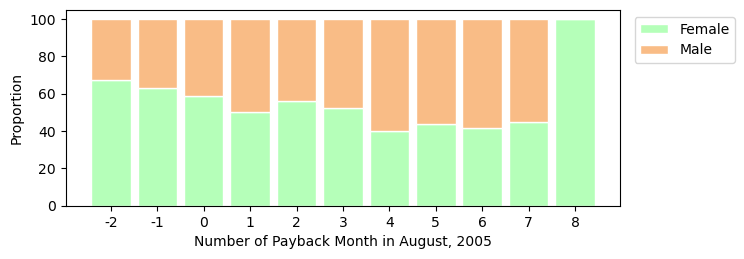

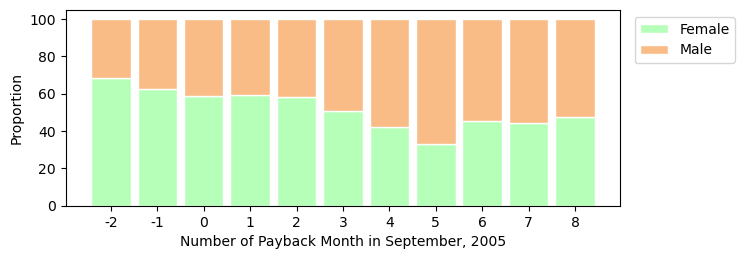

In [41]:
fig=plt.figure()
fig.suptitle("Propertion of Each Gender's Repayment Status", fontsize=18)
plot1('Repayment_Status_April,2005')
plot2('Repayment_Status_May,2005')
plot3('Repayment_Status_June,2005')
plot4('Repayment_Status_July,2005')
plot5('Repayment_Status_August,2005')
plot6('Repayment_Status_September,2005')
plt.show()

In [42]:
def plot7(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp7=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp7.loc[18.5]=['high school',8,0]
        dfp7.loc[22.1]=['others',3,0]
        dfp7.loc[22.2]=['others',4,0]
        dfp7.loc[22.3]=['others',5,0]
        dfp7.loc[22.4]=['others',6,0]
        dfp7.loc[22.5]=['others',7,0]
        dfp7.loc[22.6]=['others',8,0]
        dfp7=dfp7.sort_index().reset_index(drop=True)
        gsdf=dfp7.loc[dfp7['Education']=='graduate school']
        hsdf=dfp7.loc[dfp7['Education']=='high school']
        odf=dfp7.loc[dfp7['Education']=='others']
        udf=dfp7.loc[dfp7['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp7[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 1)
        plot7=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in April, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot7

In [43]:
def plot8(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp8=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp8.loc[6.5]=['graduate school',6,0]
        dfp8.loc[17.5]=['high school',8,0]
        dfp8.loc[21.1]=['others',3,0]
        dfp8.loc[21.2]=['others',4,0]
        dfp8.loc[21.3]=['others',5,0]
        dfp8.loc[21.4]=['others',6,0]
        dfp8.loc[21.5]=['others',7,0]
        dfp8.loc[21.6]=['others',8,0]
        dfp8.loc[31.5]=['university',8,0]
        dfp8=dfp8.sort_index().reset_index(drop=True)
        gsdf=dfp8.loc[dfp8['Education']=='graduate school']
        hsdf=dfp8.loc[dfp8['Education']=='high school']
        odf=dfp8.loc[dfp8['Education']=='others']
        udf=dfp8.loc[dfp8['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp8[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 2)
        plot8=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in May, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot8

In [44]:
def plot9(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp9=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp9.loc[13.5]=['high school',8,0]
        dfp9.loc[19.5]=['high school',8,0]
        dfp9.loc[22.5]=['others',1,0]
        dfp9.loc[23.1]=['others',3,0]
        dfp9.loc[23.2]=['others',4,0]
        dfp9.loc[23.3]=['others',5,0]
        dfp9.loc[23.4]=['others',6,0]
        dfp9.loc[23.5]=['others',7,0]
        dfp9.loc[23.6]=['others',8,0]
        dfp9.loc[26.5]=['university',1,0]
        dfp9=dfp9.sort_index().reset_index(drop=True)
        gsdf=dfp9.loc[dfp9['Education']=='graduate school']
        hsdf=dfp9.loc[dfp9['Education']=='high school']
        odf=dfp9.loc[dfp9['Education']=='others']
        udf=dfp9.loc[dfp9['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp9[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 1)
        plot9=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in June, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot9

In [45]:
def plot10(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp10=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp10.loc[13.5]=['high school',8,0]
        dfp10.loc[19.5]=['high school',8,0]
        dfp10.loc[22.5]=['others',1,0]
        dfp10.loc[23.1]=['others',3,0]
        dfp10.loc[23.2]=['others',4,0]
        dfp10.loc[23.3]=['others',5,0]
        dfp10.loc[23.4]=['others',6,0]
        dfp10.loc[23.5]=['others',7,0]
        dfp10.loc[23.6]=['others',8,0]
        dfp10=dfp10.sort_index().reset_index(drop=True)
        gsdf=dfp10.loc[dfp10['Education']=='graduate school']
        hsdf=dfp10.loc[dfp10['Education']=='high school']
        odf=dfp10.loc[dfp10['Education']=='others']
        udf=dfp10.loc[dfp10['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp10[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 2)
        plot10=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in July, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot10

In [46]:
def plot11(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp11=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp11.loc[9.5]=['graduate school',8,0]
        dfp11.loc[23.5]=['others',1,0]
        dfp11.loc[24.1]=['others',3,0]
        dfp11.loc[24.2]=['others',4,0]
        dfp11.loc[24.3]=['others',5,0]
        dfp11.loc[24.4]=['others',6,0]
        dfp11.loc[24.5]=['others',7,0]
        dfp11.loc[24.6]=['others',8,0]
        dfp11.loc[34.5]=['university',8,0]
        dfp11=dfp11.sort_index().reset_index(drop=True)
        gsdf=dfp11.loc[dfp11['Education']=='graduate school']
        hsdf=dfp11.loc[dfp11['Education']=='high school']
        odf=dfp11.loc[dfp11['Education']=='others']
        udf=dfp11.loc[dfp11['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp11[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 1)
        plot11=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in August, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot11

In [47]:
def plot12(colname):
        '''
        This function creates a data frame with the 'Education' and desired column and splits the data frame into each education level. 
        Then add the missing values for each education level in order to get the count of high school level,university level, graduate school level and other levels' sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each education level based on the number of payback months for one month in 2005.
         
        '''
        dfp12=df9.groupby(['Education',colname]).size().to_frame().reset_index()
        dfp12.loc[7.5]=['graduate school',6,0]
        dfp12.loc[25.1]=['others',3,0]
        dfp12.loc[25.2]=['others',4,0]
        dfp12.loc[25.3]=['others',5,0]
        dfp12.loc[25.4]=['others',6,0]
        dfp12.loc[25.5]=['others',7,0]
        dfp12.loc[25.6]=['others',8,0]
        dfp12=dfp12.sort_index().reset_index(drop=True)
        gsdf=dfp12.loc[dfp12['Education']=='graduate school']
        hsdf=dfp12.loc[dfp12['Education']=='high school']
        odf=dfp12.loc[dfp12['Education']=='others']
        udf=dfp12.loc[dfp12['Education']=='university']
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],hsdf[0],odf[0],udf[0])]
        bottomBars = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        middle1Bars = [i / j * 100 for i,j in zip(udf[0], totals)]
        middle2Bars = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp12[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 2)
        plot12=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle1Bars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middle2Bars, bottom=[i+j for i,j in zip(bottomBars, middle1Bars)], color='#f9bc86', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j+m for i,j,m in zip(bottomBars,middle1Bars, middle2Bars)], color='#FF8D85', edgecolor='#FF8D85',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in September, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['High School', 'University','Graduate School','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot12

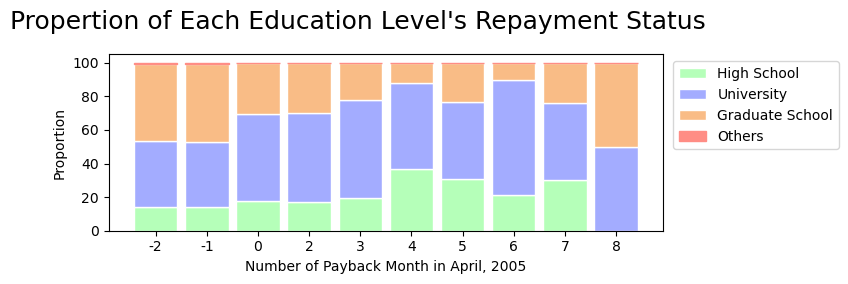

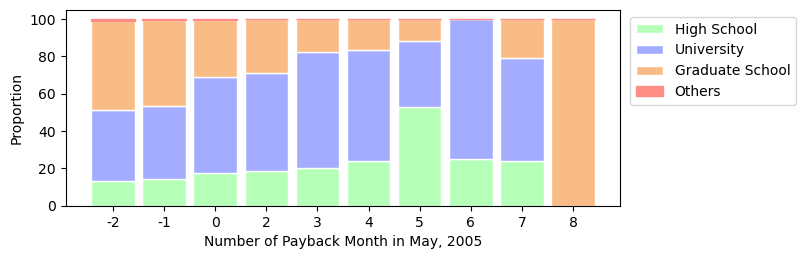

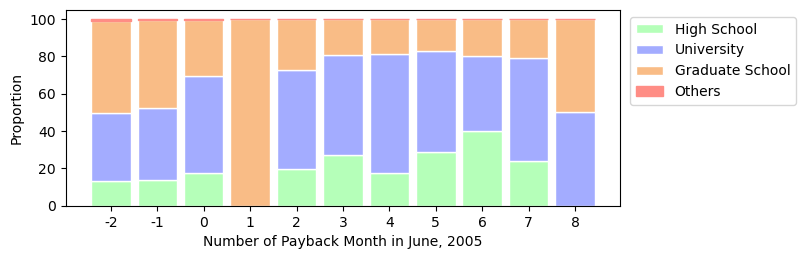

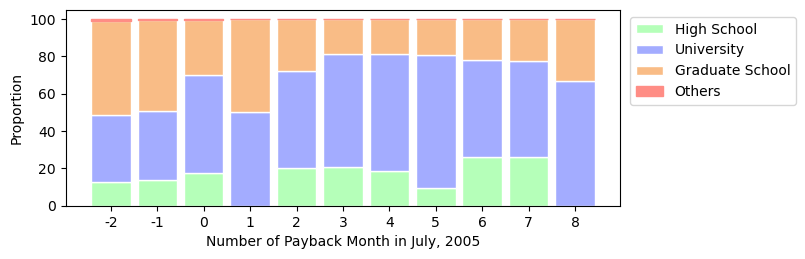

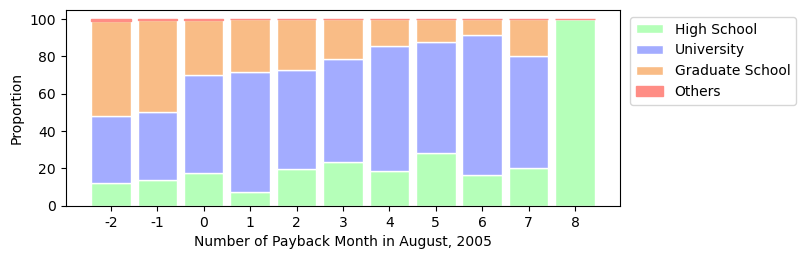

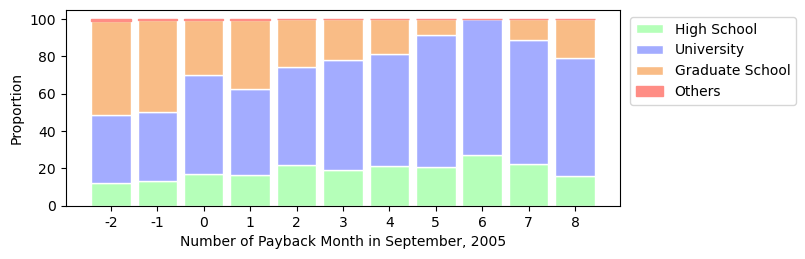

In [48]:
fig=plt.figure()
fig.suptitle("Propertion of Each Education Level's Repayment Status", fontsize=18)
plot7('Repayment_Status_April,2005')
plot8('Repayment_Status_May,2005')
plot9('Repayment_Status_June,2005')
plot10('Repayment_Status_July,2005')
plot11('Repayment_Status_August,2005')
plot12('Repayment_Status_September,2005')
plt.show()

In [49]:
def plot13(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp13=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp13.loc[14.1]=['others',4,0]
        dfp13.loc[14.2]=['others',5,0]
        dfp13.loc[16.5]=['others',8,0]
        dfp13=dfp13.sort_index().reset_index(drop=True)
        mdf=dfp13.loc[dfp13['Marriage']=='married']
        odf=dfp13.loc[dfp13['Marriage']=='others']
        sdf=dfp13.loc[dfp13['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp13[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 1)
        plot13=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in April, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot13

In [50]:
def plot14(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp14=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp14.loc[13.5]=['others',3,0]
        dfp14.loc[14.5]=['others',5,0]
        dfp14.loc[14.3]=['others',6,0]
        dfp14.loc[15.5]=['others',6,0]
        dfp14.loc[24.5]=['single',8,0]
        dfp14=dfp14.sort_index().reset_index(drop=True)
        mdf=dfp14.loc[dfp14['Marriage']=='married']
        odf=dfp14.loc[dfp14['Marriage']=='others']
        sdf=dfp14.loc[dfp14['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp14[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9]
        plt.subplot(2, 1, 2)
        plot14=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in May, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot14

In [51]:
def plot15(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp15=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp15.loc[13.5]=['others',1,0]
        dfp15.loc[15.1]=['others',4,0]
        dfp15.loc[15.2]=['others',5,0]
        dfp15.loc[15.3]=['others',6,0]
        dfp15.loc[16.5]=['others',8,0]
        dfp15.loc[19.5]=['single',1,0]
        dfp15=dfp15.sort_index().reset_index(drop=True)
        mdf=dfp15.loc[dfp15['Marriage']=='married']
        odf=dfp15.loc[dfp15['Marriage']=='others']
        sdf=dfp15.loc[dfp15['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp15[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 1)
        plot15=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in June, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot15

In [52]:
def plot16(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp16=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp16.loc[13.5]=['others',1,0]
        dfp16.loc[16.1]=['others',5,0]
        dfp16.loc[16.2]=['others',6,0]
        dfp16.loc[17.5]=['others',8,0]
        dfp16=dfp16.sort_index().reset_index(drop=True)
        mdf=dfp16.loc[dfp16['Marriage']=='married']
        odf=dfp16.loc[dfp16['Marriage']=='others']
        sdf=dfp16.loc[dfp16['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp16[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 2)
        plot16=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in July, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot16

In [53]:
def plot17(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp17=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp17.loc[17.1]=['others',5,0]
        dfp17.loc[17.2]=['others',6,0]
        dfp17.loc[17.3]=['others',7,0]
        dfp17.loc[17.4]=['others',8,0]
        dfp17.loc[27.5]=['single',8,0]
        dfp17=dfp17.sort_index().reset_index(drop=True)
        mdf=dfp17.loc[dfp17['Marriage']=='married']
        odf=dfp17.loc[dfp17['Marriage']=='others']
        sdf=dfp17.loc[dfp17['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp17[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 1)
        plot17=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in August, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot17

In [54]:
def plot18(colname):
        '''
        This function creates a data frame with the 'Marriage' and desired column and splits the data frame into each marital status. 
        Then add the missing values for each marital status in order to get the count of married, single and other sample clients. 
        The count divided by the total number of clients for every number of repayment months will produce a percentage.
        This function will return a plot consisting of the proportions for each marital status based on the number of payback months for one month in 2005.
         
        '''
        dfp18=df9.groupby(['Marriage',colname]).size().to_frame().reset_index()
        dfp18.loc[16.1]=['others',4,0]
        dfp18.loc[16.2]=['others',5,0]
        dfp18.loc[16.3]=['others',6,0]
        dfp18.loc[16.4]=['others',7,0]
        dfp18.loc[16.5]=['others',8,0]
        dfp18=dfp18.sort_index().reset_index(drop=True)
        mdf=dfp18.loc[dfp18['Marriage']=='married']
        odf=dfp18.loc[dfp18['Marriage']=='others']
        sdf=dfp18.loc[dfp18['Marriage']=='single']
        totals = [i+j+m for i,j,m in zip(mdf[0],odf[0],sdf[0])]
        bottomBars = [i / j * 100 for i,j in zip(mdf[0], totals)]
        middleBars = [i / j * 100 for i,j in zip(sdf[0], totals)]
        upperBars = [i / j * 100 for i,j in zip(odf[0], totals)]
        rows=dfp18[colname].unique()
        r = [0,1,2,3,4,5,6,7,8,9,10]
        plt.subplot(2, 1, 2)
        plot18=(
               plt.bar(x=r,height=bottomBars, color='#b5ffb9', edgecolor='white',width=0.85),
               plt.bar(x=r,height=middleBars, bottom=bottomBars,color='#a3acff', edgecolor='white',width=0.85),
               plt.bar(x=r,height=upperBars, bottom=[i+j for i,j in zip(bottomBars, middleBars)], color='#f9bc86', edgecolor='#f9bc86',width=0.85),
               plt.xticks(r,rows),
               plt.xlabel('Number of Payback Month in September, 2005'),
               plt.ylabel('Proportion'),
               plt.ylim(0,105),
               plt.tight_layout(),
               plt.legend(['Married', 'Single','Others'], loc ='upper right',bbox_to_anchor=(1.33, 1)),
               plt.show())
        
        return plot18

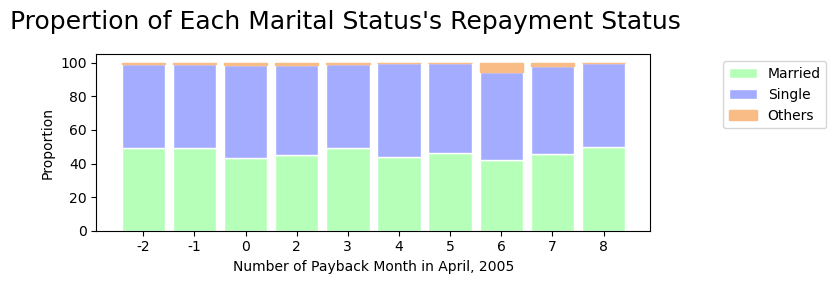

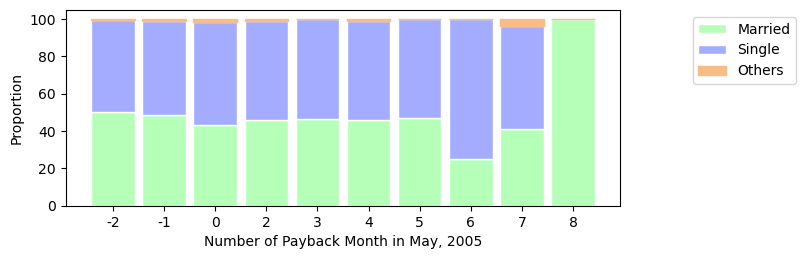

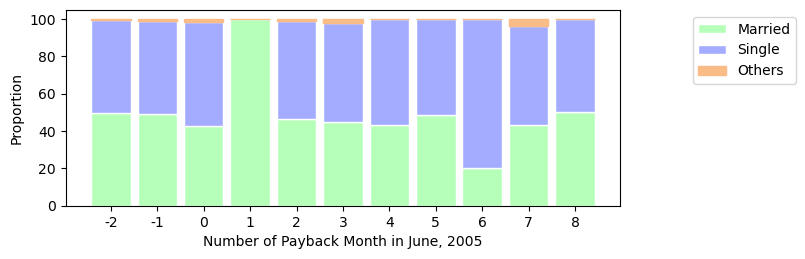

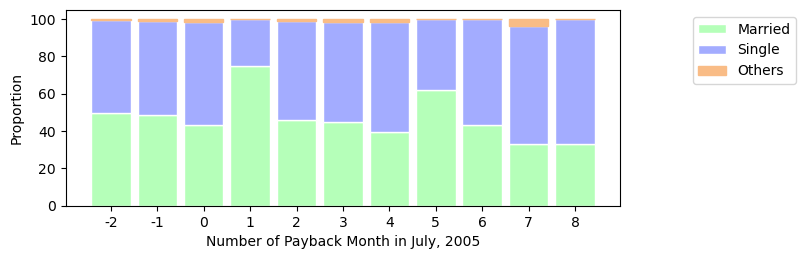

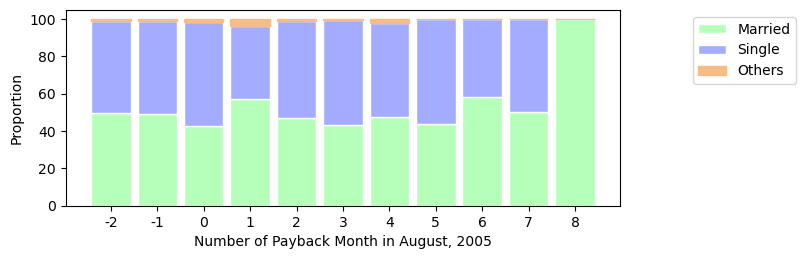

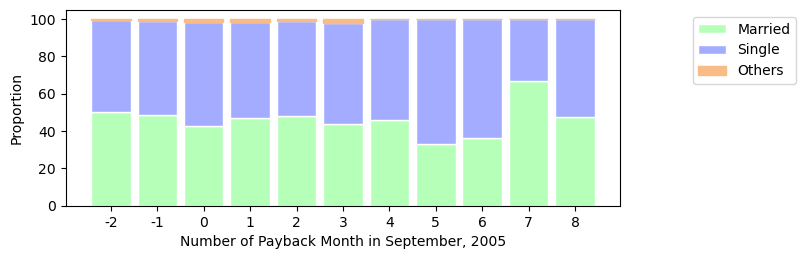

In [ ]:
fig=plt.figure()
fig.suptitle("Propertion of Each Marital Status's Repayment Status", fontsize=18)
plot13('Repayment_Status_April,2005')
plot14('Repayment_Status_May,2005')
plot15('Repayment_Status_June,2005')
plot16('Repayment_Status_July,2005')
plot17('Repayment_Status_August,2005')
plot18('Repayment_Status_September,2005')
plt.show()

Text(0.5, 1.02, 'Distribution of Average Repayment Stataus by Age')

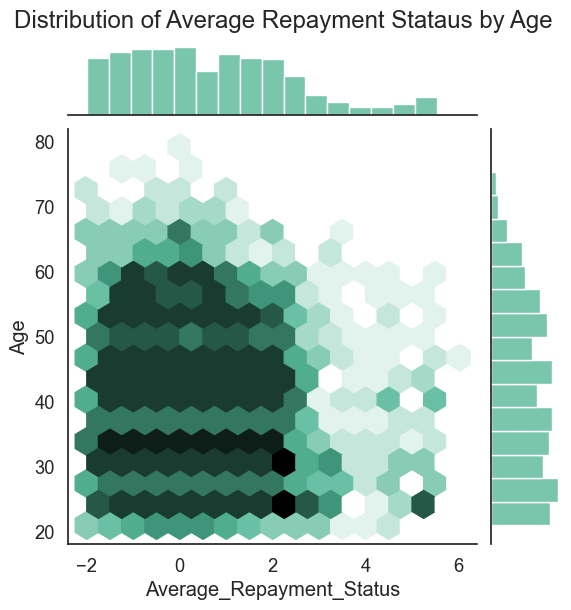

In [56]:
dfp19=df9.groupby(['Age','Average_Repayment_Status']).size().to_frame().reset_index()
sns.set(style='white',font_scale=1.2)
plot19=sns.jointplot(y='Age',x='Average_Repayment_Status',kind="hex",data=dfp19,color="#4CB391")
plt.suptitle('Distribution of Average Repayment Stataus by Age',y=1.02)